Training k-NN classifier...
k-NN Accuracy: 1.00


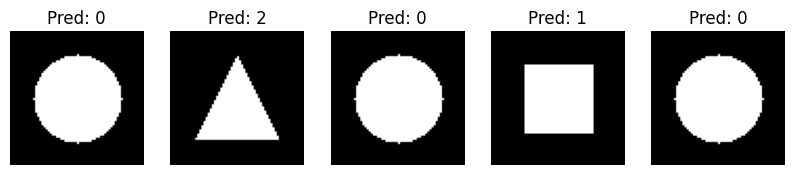

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
def generate_shape(shape, size=64):
    img = np.zeros((size, size), dtype=np.uint8)
    center = (size // 2, size // 2)
    if shape == "circle":
        cv2.circle(img, center, size // 3, 255, -1) 
    elif shape == "square":
        cv2.rectangle(img, (size//4, size//4), (3*size//4, 3*size//4), 255, -1) 
    elif shape == "triangle":
        pts = np.array([[size//2, size//5], [size//5, 4*size//5], [4*size//5, 4*size//5]], np.int32)
        cv2.fillPoly(img, [pts], 255)
    return img

def create_dataset(num_samples=100):
    shapes = ["circle", "square", "triangle"]
    X, y = [], []
    for i, shape in enumerate(shapes):
        for _ in range(num_samples):
            img = generate_shape(shape)
            X.append(img.flatten()) # Flatten image into a feature vector
            y.append(i) # Assign numerical label
    return np.array(X), np.array(y)

X, y = create_dataset(300)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- k-NN Classifier ----
print("Training k-NN classifier...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)

# Display Results
print(f"k-NN Accuracy: {knn_acc:.2f}")

# Plot sample classified images
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(X_test[i].reshape(64, 64), cmap="gray")
    axes[i].set_title(f"Pred: {y_pred_knn[i]}") 
    axes[i].axis("off")
plt.show()

